In [1]:
#Imports
import sys
util_dir = '../../common_scripts/pipe_utils/'
sys.path.append(util_dir)
from import_file import *
import argparse
% matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Load data, define spike-ins
datafile = '/Users/maryk.thompson/Desktop/Davislab/comp_labbook_backup/data/computational_projects/C2/C2.15.SnakeMakeSetup/pipeline_testing/byGene/plusI/inspect_data_full.csv'
df = pd.read_csv(datafile, header = [0,1])
df.set_index(('gene_info', 'transcript'), inplace = True, drop = False)
df.index.rename('transcript', inplace = True)

#get set of ercc and sirv transcripts by name
all_genes = df.index
erccs = set([i for i in all_genes if i.startswith('ERCC')])
sirvs = set([i for i in all_genes if i.startswith('SIRV')])

spike = erccs | sirvs

reps = [i for i  in df.columns.levels[0] if i.startswith('rep')]
cols = df.columns.levels[1]


In [ ]:
#drop the spike-in vals so that they won't be included in any of the analyses below
df.drop(labels = spike, inplace = True)

Text(0,0.5,'fraction TPM')

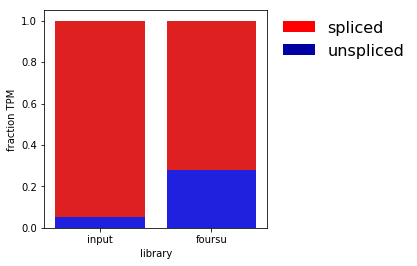

In [36]:
#Make stacked bar for intron and exon-mapping reads
#Discussion of how to posistion the legend, for now I lined it up by eye with the top of the plot
#It's tricky because I want to alight by top and the loc and bbox() aligns to the bottom.
#So if I wanted to get exactly right, I'd need to figure out the height of the legend and do some calcs
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-matplotlib-plot
#https://matplotlib.org/api/legend_api.html
sum_dict = {'foursu':{'intron': 0.28, 'total': 1}, 'input': {'intron': 0.05, 'total': 1}}

sum_df = pd.DataFrame.from_dict(sum_dict, orient = 'index')
sum_df['library'] = sum_df.index

#order the plot to have input, then foursu
new_index = ['input', 'foursu']
sum_df = sum_df.reindex(new_index)

#this scales the width of the bars but the legend is still plotted on top of the bars
width = 4
height = 4
fig = plt.figure(figsize = (width, height))
ax = fig.add_subplot(111)
    
sns.barplot(data = sum_df, x = 'library', y = 'total', color = 'red', ax = ax)
bottom_plot = sns.barplot(data = sum_df, x = 'library', y = 'intron', color = 'blue', ax = ax)

total_bar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
intron_bar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([total_bar, intron_bar], ['spliced', 'unspliced'], loc = (1.04, 0.75), prop={'size':16})
l.draw_frame(False)
bottom_plot.set_ylabel("fraction TPM")

In [41]:
f = pipeline_aux.test_plot()

In [53]:
#'{:02.2f}'.format(32.46758758)
'% input recovered in foursu: {:02.2f}'.format(32.46758758)

'% input recovered in foursu: 32.47'

s sirv_scaled


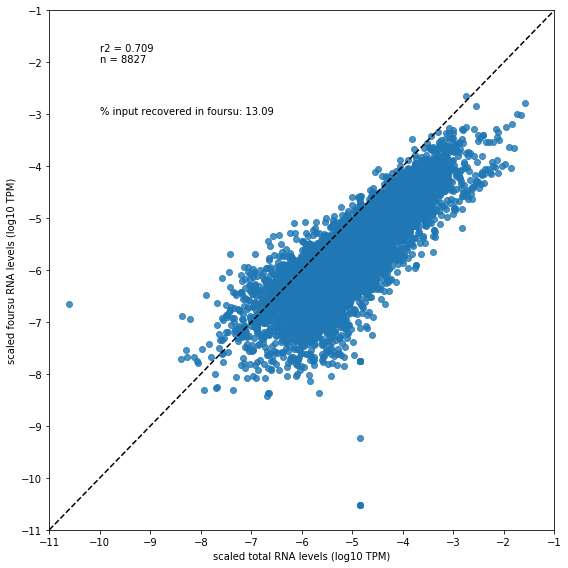

In [75]:
#Plot frac pd/frac input for each gene. Also label with total % pd for each replicate

'TPM_exon_total_sirv_scaled'
'TPM_intron_total_sirv_scaled'
'TPM_exon_foursu_sirv_scaled'
'TPM_intron_foursu_sirv_scaled'

#Calculate the fraction of each library comprised of introns and exons
#Note that I probably want to limit this to coding genes as well -- load gffutils and take care of this?

#https://pyformat.info/

reps = ['rep_1']
for rep in reps:
    data = df[(rep)].copy() #this selects the data for the replicate
    m = 'TPM'
    #for s in ['sirv_scaled', 'ercc_scaled']:
    for s in ['sirv_scaled']:
        print('s', s)
        l = [i for i in cols if i.startswith(m) and i.endswith(s)]
        foursu_exon = [i for i in l if 'exon' in i and 'foursu' in i][0]
        input_exon = [i for i in l if 'exon' in i and 'foursu' not in i][0]
        foursu_intron = [i for i in l if 'intron' in i and 'foursu' in i][0]
        input_intron = [i for i in l if 'intron' in i and 'foursu' not in i][0]
        
        data['%s_inputall_%s' % (m, s)] = data[input_exon] + data[input_intron]
        data['%s_foursuall_%s' % (m, s)] = data[foursu_exon] + data[foursu_intron]

        foursu_all_sum = data['%s_foursuall_%s' % (m, s)].sum()
        input_all_sum = data['%s_inputall_%s' % (m, s)].sum()

        percent_foursu = (foursu_all_sum/input_all_sum)*100
        
        outname = 'test_compare_plot'
        #results = pipeline_aux.plot(data, cols = ['%s_inputall_%s' % (m, s), '%s_foursuall_%s' % (m, s)], plottype = 'scatter', logbase = 10, labels = {'ylabel':'scaled foursu RNA levels (log10 TPM)', 'xlabel':'scaled total RNA levels (log10 TPM)'}, text = ['% input recovered in foursu: {:02.2f}'.format(percent_foursu), 0.1, 0.8], filename = outname)
        results = pipeline_aux.plot(data, cols = ['%s_inputall_%s' % (m, s), '%s_foursuall_%s' % (m, s)], plottype = 'regplot', logbase = 10, labels = {'ylabel':'scaled foursu RNA levels (log10 TPM)', 'xlabel':'scaled total RNA levels (log10 TPM)'}, text = ['% input recovered in foursu: {:02.2f}'.format(percent_foursu), 0.1, 0.8], ax_loc = 1.0, limits = {'x':[-11, -1], 'y':[-11, -1]}, xy_line = True, filename = outname)

        #results = pipeline_aux.plot(data, cols = ['%s_inputall_%s' % (m, s), '%s_foursuall_%s' % (m, s)], plottype = 'scatter', logbase = 10, filename = outname, text = ['% input recovered in foursu: {:02.2f}'.format(percent_foursu), 0.1, 0.7])

        #adding x=y line
        #https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data
        
        #results['ax'].text()
        #results['ax'].text(0.1, 0.7, '% input recovered in foursu: {:02.2f}'.format(percent_foursu), transform = ax.transAxes)
        #results['ax'].text(0.1, 0.7, 'testing position!!!!!!!!!', transform = ax.transAxes)

        #'% input recovered in foursu: {:02.2f}'.format(32.46758758)
        #results['ax'].text(0.1, 0.7, 'foursu/input = %1.3f \%' % percent_foursu, transform = ax.transAxes)

        #plt.close(results['fig'])
    
        #input_intron_sum = data[input_intron].sum()
        #input_all_sum = data['%s_inputall_%s' % (m, s)].sum()
        
        #foursu_intron_sum = data[foursu_intron].sum()
        #foursu_all_sum = data['%s_foursuall_%s' % (m, s)].sum()
        
        #print('frac intron total', input_intron_sum/input_all_sum)
        #print('frac intron foursu', foursu_intron_sum/foursu_all_sum)
        
        #data['%s_inputall_%s' % (m, s)] = data[input_exon] + data[input_intron]
        #data['%s_foursuall_%s' % (m, s)] = data[foursu_exon] + data[foursu_intron]

        #foursu_sum = data['%s_foursuall_%s' % (m, s)].sum()
        #input_sum = data['%s_inputall_%s' % (m, s)].sum()

        #foursu_sum = data[foursu_exon].sum()
        #input_sum = data[input_exon].sum()

        #print('percent recovery', (foursu_sum/input_sum)*100)
        
#https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib

In [65]:
plt.close(results['fig'])

In [77]:
df
df.loc[:, (rep, ercc_df['TPM_exon_foursu_sirv_scaled'])] = df.loc[:, (rep, ercc_df['TPM_exon_foursu_sirv_scaled'])] * 432


NameError: name 'ercc_df' is not defined

In [7]:
#Calculate the fraction of each library comprised of introns and exons
#Note that I probably want to limit this to coding genes as well -- load gffutils and take care of this?

#https://randyzwitch.com/creating-stacked-bar-chart-seaborn/
reps = ['rep_1']
for rep in reps:
    data = df[(rep)].copy() #this selects the data for the replicate
    m = 'TPM'
    for s in ['sirv_scaled', 'ercc_scaled']:
        print('s', s)
        l = [i for i in cols if i.startswith(m) and i.endswith(s)]
        foursu_exon = [i for i in l if 'exon' in i and 'foursu' in i][0]
        input_exon = [i for i in l if 'exon' in i and 'foursu' not in i][0]
        foursu_intron = [i for i in l if 'intron' in i and 'foursu' in i][0]
        input_intron = [i for i in l if 'intron' in i and 'foursu' not in i][0]
        
        data['%s_inputall_%s' % (m, s)] = data[input_exon] + data[input_intron]
        data['%s_foursuall_%s' % (m, s)] = data[foursu_exon] + data[foursu_intron]

        input_intron_sum = data[input_intron].sum()
        input_all_sum = data['%s_inputall_%s' % (m, s)].sum()
        
        foursu_intron_sum = data[foursu_intron].sum()
        foursu_all_sum = data['%s_foursuall_%s' % (m, s)].sum()
        
        print('frac intron total', input_intron_sum/input_all_sum)
        print('frac intron foursu', foursu_intron_sum/foursu_all_sum)
        
        #data['%s_inputall_%s' % (m, s)] = data[input_exon] + data[input_intron]
        #data['%s_foursuall_%s' % (m, s)] = data[foursu_exon] + data[foursu_intron]

        #foursu_sum = data['%s_foursuall_%s' % (m, s)].sum()
        #input_sum = data['%s_inputall_%s' % (m, s)].sum()

        #foursu_sum = data[foursu_exon].sum()
        #input_sum = data[input_exon].sum()

        #print('percent recovery', (foursu_sum/input_sum)*100)

s sirv_scaled
frac intron total 0.0547324313812
frac intron foursu 0.286949888761
s ercc_scaled
frac intron total 0.0547324313812
frac intron foursu 0.286949888761
s sirv_scaled
frac intron total 0.0548363371486
frac intron foursu 0.264927659817
s ercc_scaled
frac intron total 0.0548363371486
frac intron foursu 0.264927659817
s sirv_scaled
frac intron total 0.0506098703801
frac intron foursu 0.275158375516
s ercc_scaled
frac intron total 0.0506098703801
frac intron foursu 0.275158375516


In [5]:
#Calculate the fraction of the input recovered in the pulldown using the SIRV and/or ERCC spikeins
for rep in reps:
    data = df[(rep)].copy() #this selects the data for the replicate
    for m in ['NumReads']:
        for s in ['sirv_scaled', 'ercc_scaled']:
            print('s', s)
            l = [i for i in cols if i.startswith(m) and i.endswith(s)]
            foursu_exon = [i for i in l if 'exon' in i and 'foursu' in i][0]
            input_exon = [i for i in l if 'exon' in i and 'foursu' not in i][0]
            foursu_intron = [i for i in l if 'intron' in i and 'foursu' in i][0]
            input_intron = [i for i in l if 'intron' in i and 'foursu' not in i][0]
            data['%s_inputall_%s' % (m, s)] = data[input_exon] + data[input_intron]
            data['%s_foursuall_%s' % (m, s)] = data[foursu_exon] + data[foursu_intron]

            foursu_sum = data['%s_foursuall_%s' % (m, s)].sum()
            input_sum = data['%s_inputall_%s' % (m, s)].sum()
            
            #foursu_sum = data[foursu_exon].sum()
            #input_sum = data[input_exon].sum()
            
            print('percent recovery', (foursu_sum/input_sum)*100)

rep rep_1
s sirv_scaled
percent recovery 9.15549604534
s ercc_scaled
percent recovery 20.4966308604
rep rep_2
s sirv_scaled
percent recovery 8.02595595952
s ercc_scaled
percent recovery 26.5193847512
rep rep_3
s sirv_scaled
percent recovery 9.78032135136
s ercc_scaled
percent recovery 22.8120993284


In [16]:
l = ['TPM_exon_foursu_sirv_scaled', 'TPM_exon_total_sirv_scaled', 'TPM_intron_foursu_sirv_scaled', 'TPM_intron_total_sirv_scaled']
foursu_exon = [i for i in l if 'exon' in i and 'foursu' in i][0]
input_exon = [i for i in l if 'exon' in i and 'foursu' not in i][0]
foursu_intron = [i for i in l if 'intron' in i and 'foursu' in i][0]
input_intron = [i for i in l if 'intron' in i and 'foursu' not in i][0]

print(foursu_exon)
print(input_exon)
print(foursu_intron)
print(input_intron)

TPM_exon_foursu_sirv_scaled
TPM_exon_total_sirv_scaled
TPM_intron_foursu_sirv_scaled
TPM_intron_total_sirv_scaled


In [35]:
for rep in reps:
    print('rep', rep)

    data = df[(rep)].copy() #this selects the data for the replicate
    #m = 'TPM'
    #m = 'NumReads'
    #s = 'sirv_scaled'
    for m in ['NumReads']:
        for s in ['sirv_scaled', 'ercc_scaled']:
            print('s', s)
            l = [i for i in cols if i.startswith(m) and i.endswith(s)]
            foursu_exon = [i for i in l if 'exon' in i and 'foursu' in i][0]
            input_exon = [i for i in l if 'exon' in i and 'foursu' not in i][0]
            foursu_intron = [i for i in l if 'intron' in i and 'foursu' in i][0]
            input_intron = [i for i in l if 'intron' in i and 'foursu' not in i][0]
            data['%s_inputall_%s' % (m, s)] = data[input_exon] + data[input_intron]
            data['%s_foursuall_%s' % (m, s)] = data[foursu_exon] + data[foursu_intron]

            #foursu_sum = data['%s_foursuall_%s' % (m, s)].sum()
            #input_sum = data['%s_inputall_%s' % (m, s)].sum()
            
            foursu_sum = data[foursu_exon].sum()
            input_sum = data[input_exon].sum()
            
            

            print('percent recovery', (foursu_sum/input_sum)*100)
#data
outname = 'testscatter2'

#


#pipeline_aux.plot(data, cols = ['%s_inputall_%s' % (m, s), '%s_foursuall_%s' % (m, s)], plottype = 'scatter', logbase = 10, labels = {'ylabel':'foursu RNA levels (TPM)', 'xlabel':'total RNA levels (TPM)'}, filename = outname)

#plt.show()

#About half of the reads 4sU reads are from introns. This doesn't seem very consistent with most of the signal coming from non-specific
#pulldown from S-thiolated proteins.

rep rep_1
s sirv_scaled
percent recovery 3.91872978273
s ercc_scaled
percent recovery 8.77295532653
rep rep_2
s sirv_scaled
percent recovery 3.55717952904
s ercc_scaled
percent recovery 11.7536419382
rep rep_3
s sirv_scaled
percent recovery 4.20078768854
s ercc_scaled
percent recovery 9.7981224303


In [28]:
data = df[(rep)]
data

,synthesis,degradation,processing,pass_filter,TPM_exon_foursu,NumReads_exon_foursu,TPM_intron_foursu,NumReads_intron_foursu,TPM_total_foursu,counts_total_foursu,...,NumReads_exon_total_ercc_scaled,NumReads_exon_total_sirv_scaled,NumReads_exon_total_spike_scaled,TPM_exon_total_ercc_scaled,TPM_exon_total_sirv_scaled,TPM_exon_total_spike_scaled,synth_est,decay_est,decay_simple_est,proc_est
transcript,,,,,,,,,,,,,,,,,,,,,
ERCC-00057,13.981604,0.010044,NaN,True,65.712909,133.001100,0.000000,132.998900,65.712909,266.000000,...,3.141391e-03,0.014622,2.585838e-03,4.591721e-04,2.137230e-03,3.779678e-04,0.000049,-5.612789e+01,0.003353,0.003353
ERCC-00073,1.138065,0.004562,NaN,False,5.348854,5.500000,0.000000,5.500000,5.348854,11.000000,...,2.881281e-04,0.001341,2.371729e-04,8.228454e-05,3.829959e-04,6.773257e-05,0.000002,2.014587e+02,0.001512,0.001512
ERCC-00077,47.867271,0.019848,NaN,True,224.974012,58.000000,0.000000,58.000000,224.974012,116.000000,...,7.263674e-04,0.003381,5.979098e-04,7.955545e-04,3.702932e-03,6.548612e-04,0.000021,2.328750e+03,0.006324,0.006324
ERCC-00104,279.771140,0.014244,NaN,True,1314.911709,5806.985855,0.000000,5807.014145,1314.911709,11614.000000,...,9.576452e-02,0.445739,7.882863e-02,6.479210e-03,3.015768e-02,5.333366e-03,0.002141,8.423389e+02,0.004803,0.004803
ERCC-00112,174.927088,0.009153,NaN,True,822.149406,1884.485354,0.000000,1884.514646,822.149406,3769.000000,...,4.873955e-02,0.226860,4.011999e-02,6.303914e-03,2.934176e-02,5.189071e-03,0.000695,-1.116965e+03,0.003062,0.003062
ERCC-00142,15.522836,0.007395,NaN,True,72.956628,56.000000,0.000000,56.000000,72.956628,112.000000,...,1.825161e-03,0.008495,1.502382e-03,6.924328e-04,3.222949e-03,5.699765e-04,0.000021,2.527201e+02,0.002430,0.002430
ERCC-00162,2454.704610,0.007857,NaN,True,11537.000699,9655.535642,0.000000,9655.464358,11537.000699,19311.000000,...,2.953874e-01,1.374889,2.431483e-01,1.030611e-01,4.797011e-01,8.483483e-02,0.003559,-1.106996e+02,0.002589,0.002589
ERCC-00165,15.848177,0.007421,NaN,True,74.485716,124.500244,0.000000,124.499756,74.485716,249.000000,...,3.972089e-03,0.018488,3.269628e-03,7.044990e-04,3.279111e-03,5.799088e-04,0.000046,-5.556278e+04,0.002482,0.002482
ERCC-00168,216.445338,0.009729,NaN,True,1017.283304,2056.488492,0.000000,2056.511508,1017.283304,4113.000000,...,5.015208e-02,0.233434,4.128272e-02,7.338957e-03,3.415940e-02,6.041068e-03,0.000758,-3.512558e+03,0.003248,0.003248


In [14]:
cols = df.columns.levels[1]
col_dict = {} #{sirv: {tpm:[x,y], counts:[x,y]}}
metrics = ['TPM', 'NumReads']
scales = ['sirv_scaled', 'ercc_scaled']

for m in metrics:
    for s in scales:
        #get all columns using this measurement
        l = [i for i in cols if i.startswith(m) and i.endswith(s)]
        foursu_intron = l
        
        print(total_exon)
#print('cols', cols)
#TPM_exon_foursu_sirv_scaled
#reps = [i for i  in df.columns.levels[0] if i.startswith('rep')]
#to_plot = [i for i in df.columns.levels[1] if 'counts' in i]

['TPM_exon_foursu_sirv_scaled', 'TPM_exon_total_sirv_scaled', 'TPM_intron_foursu_sirv_scaled', 'TPM_intron_total_sirv_scaled']
['TPM_exon_foursu_ercc_scaled', 'TPM_exon_total_ercc_scaled', 'TPM_intron_foursu_ercc_scaled', 'TPM_intron_total_ercc_scaled']
['NumReads_exon_foursu_sirv_scaled', 'NumReads_exon_total_sirv_scaled', 'NumReads_intron_foursu_sirv_scaled', 'NumReads_intron_total_sirv_scaled']
['NumReads_exon_foursu_ercc_scaled', 'NumReads_exon_total_ercc_scaled', 'NumReads_intron_foursu_ercc_scaled', 'NumReads_intron_total_ercc_scaled']


In [12]:
genes_dict = {'ERCC':erccs, 'SIRV':sirvs}
gene_sets = list(genes_dict)
all_genes = set().union(*list(genes_dict.values()))
#this_outdir = os.path.join(outdir, 'spike_ins')
#os.makedirs(this_outdir, exist_ok = True)
data = df.loc[df.index.isin(genes_dict['ERCC'])]
#data['txt'] = data.index
#get rep hierarchical index
reps = [i for i  in df.columns.levels[0] if i.startswith('rep')]
to_plot = [i for i in df.columns.levels[1] if 'counts' in i]

gene_sets = list(genes_dict)
all_genes = set().union(*list(genes_dict.values()))
this_outdir = 'spike_ins'
os.makedirs(this_outdir, exist_ok = True)
rep = 'rep_1'
#for rep in reps:
#data = df.loc[df.index.isin(genes_dict[s]), rep]
#data = df[(rep)] #this selects the data for the replicate
#Is there an equivalent way of selecting on the 2nd hierarchical level?

#data = df.loc[:, (rep)]
#cols = data.columns.values
#measure
#'sirv_scaled'
#data

SyntaxError: invalid syntax (<ipython-input-12-add88a8131cd>, line 20)

In [48]:
def quick_plot(df):
    sns.barplot(data = df, x = 'transcript', y = 'TPM_exon_foursu')
    df['txt'] = 'a'
    return df

array(['synthesis', 'degradation', 'processing', 'pass_filter',
       'TPM_exon_foursu', 'NumReads_exon_foursu', 'TPM_intron_foursu',
       'NumReads_intron_foursu', 'TPM_total_foursu', 'counts_total_foursu',
       'TPM_exon_total', 'NumReads_exon_total', 'TPM_intron_total',
       'NumReads_intron_total', 'TPM_total_total', 'counts_total_total',
       'NumReads_intron_foursu_ercc_scaled',
       'NumReads_intron_foursu_sirv_scaled',
       'NumReads_intron_foursu_spike_scaled',
       'TPM_intron_foursu_ercc_scaled', 'TPM_intron_foursu_sirv_scaled',
       'TPM_intron_foursu_spike_scaled',
       'NumReads_exon_foursu_ercc_scaled',
       'NumReads_exon_foursu_sirv_scaled',
       'NumReads_exon_foursu_spike_scaled', 'TPM_exon_foursu_ercc_scaled',
       'TPM_exon_foursu_sirv_scaled', 'TPM_exon_foursu_spike_scaled',
       'NumReads_intron_total_ercc_scaled',
       'NumReads_intron_total_sirv_scaled',
       'NumReads_intron_total_spike_scaled',
       'TPM_intron_total_ercc_scal

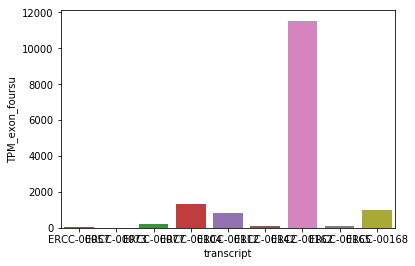

In [54]:
#rep_df.index
test_df = rep_df.copy()
#test_df.reset_index()
#test_df

new_df = quick_plot(test_df.reset_index())
#even though this is not inplace, by returning from function, effectively is

#sns.barplot(data = test_df.reset_index(), x = 'transcript', y = 'TPM_exon_foursu')
new_df.set_index('transcript', inplace = True)
new_df.columns.values
#new_df = pipeline_aux.quick_barplot(data = rep_df, y_col = cat, x_col = 'transcript', divide_by = total, percent = True, outname = outname, x_label = 'transcript', y_label = '% of mapping transcripts')
#https://stackoverflow.com/questions/20084487/use-index-in-pandas-to-plot-data
#sns.regplot(data = df_comments.reset_index(), x = 'index', y = 'score')

In [37]:
gene_sets = list(genes_dict)
all_genes = set().union(*list(genes_dict.values()))
#print('genedict', genes_dict)
#print('gene_sets', gene_sets)
#print('all_genes', all_genes)

this_outdir = 'spike_ins'
os.makedirs(this_outdir, exist_ok = True)

#get rep hierarchical index
reps = [i for i  in df.columns.levels[0] if i.startswith('rep')]
to_plot = [i for i in df.columns.levels[1] if 'counts' in i]

print(reps)
print(to_plot)

['rep_1', 'rep_2', 'rep_3']
['counts_total_foursu', 'counts_total_total']


In [45]:
import re
SIRV_abundance_file = "/Users/maryk.thompson/Desktop/Davislab/C2.18.spike_in_stability/notebooks/SIRV_spikein_molarities.csv"
SIRV_ab_df = pd.read_csv(SIRV_abundance_file, index_col = 'Name')

#get rep hierarchical index
reps = [i for i  in df.columns.levels[0] if i.startswith('rep')]
to_plot = [i for i in df.columns.levels[1] if 'counts' in i]
print(reps)
print(to_plot)
#['counts_total_foursu', 'counts_total_total']
#get the columns that match total_1, etc. or foursu_1, etc.
#tot_pattern = re.compile("total_[0-9]")
#foursu_pattern = re.compile("foursu_[0-9]")

#because I'm using the word total to equal both total RNA and intron+exon, need to do this
#perhaps later change to eq instead of total?
total_cols = [i for i in to_plot if 'foursu' not in i]
foursu_cols = [i for i in to_plot if 'foursu' in i]


exps = total_cols + foursu_cols
print('exps', exps)
for rep in reps:
    data = df.loc[df.index.isin(genes_dict[s]), rep]

    #plot counts vs. known molar spikein concentration
    for i in exps:
        merged_df = pd.merge(data, SIRV_ab_df, left_index = True, right_index = True)
        pipeline_aux.plot(merged_df, cols = ['E2', i], plottype = 'scatter', logbase = 10, labels = {'ylabel':'read counts', 'xlabel':'conc. (fmol/ul)'}, filename = 'test_spike_%s' % i)

        #pipeline_aux.scatter_plot(merged_df, x_col = 'E2', y_col = i, x_name = 'conc. (fmol/ul)', y_name = 'read counts', filename = 'test_spike_%s' % i, logbase = 10)

        #def scatter_plot(df, x_col = None, y_col = None, x_name = None, y_name = None, filename = None, logbase = None, title = None):

    #check reproducibility between foursu and total for each replicate
    for i in range(0, len(total_cols)):
        #merged_df = pd.merge(total_cols[i], SIRV_quant_df[[foursu_cols[i]]], left_index = True, right_index = True)
        pipeline_aux.plot(merged_df, cols = [total_cols[i], foursu_cols[i]], plottype = 'scatter', logbase = 10, labels = {'ylabel':'foursu RNA levels (TPM)', 'xlabel':'total RNA levels (TPM)'}, filename = 'test_compare_%s' % i)


['rep_1', 'rep_2', 'rep_3']
['counts_total_foursu', 'counts_total_total']
exps ['counts_total_total', 'counts_total_foursu']


In [41]:
#Replace plot_spikeins.py with below:
#get all spikein gene names
gene_sets = list(genes_dict)
all_genes = set().union(*list(genes_dict.values()))

#this_outdir = os.path.join(outdir, 'spike_ins')
this_outdir = 'spike_ins2'
os.makedirs(this_outdir, exist_ok = True)


#get rep hierarchical index
reps = [i for i  in df.columns.levels[0] if i.startswith('rep')]
to_plot = [i for i in df.columns.levels[1] if 'counts' in i]

#make plot and summary table for each set of spikeins (ERCC, SIRV)
for s in genes_dict:
    count_dfs = []
    percent_dfs = []
    for cat in to_plot:
        for rep in reps:
            outname = os.path.join(this_outdir, '_'.join([s, cat, rep, 'bar']))
            total = df[(rep, cat)].sum()
            data = df.loc[df.index.isin(genes_dict[s]), rep]
            #add index to column for easy passing to seaborn
            expname = '%s_%s' % (cat, rep)
            #if there are reads mapped to spikeins, then make plots and output files
            if not data.empty:
                new_df = pipeline_aux.quick_barplot(data = data.reset_index(), y_col = cat, x_col = 'transcript', divide_by = total, percent = True, outname = outname, x_label = 'transcript', y_label = '% of mapping transcripts')
            else:
                new_df = data
                new_df['percent'] = np.nan
                new_df['frac'] = np.nan

            new_df.rename(columns = {'percent': 'percent_%s' % expname, 'frac': 'frac_%s' % expname}, inplace = True)

            count_dfs.append(new_df[['frac_%s' % expname]])
            percent_dfs.append(new_df[['percent_%s' % expname]])

    #write summary output files
    summary_df = pd.concat(count_dfs + percent_dfs, axis = 1)
    summary_df.to_csv(os.path.join(this_outdir, '%s_spike_counts.csv' % s))

#Remove ERCC and SIRV genes from dataset as we don't want to plot these for gene reproducibility
#df.drop(labels = all_genes, inplace = True)

In [30]:
test_df = rep_df.reset_index(inplace = True)
test_df

In [32]:
rep = 'rep_1'
cat = 'TPM_exon_foursu'
outname = 'testplot3'
rep_df = data[(rep)]
total = rep_df[cat].sum()

#new_df = pipeline_aux.quick_barplot(y = vals, x = txts, divide_by = total, percent = True, outname = outname, x_label = 'transcript', y_label = '% of mapping transcripts')
#using .reset_index() = hacky way to get it to interpret the index as a column
new_df = pipeline_aux.quick_barplot(data = rep_df.reset_index(), y_col = cat, x_col = 'transcript', divide_by = total, percent = True, outname = outname, x_label = 'transcript', y_label = '% of mapping transcripts')